# This script 
=> loads preprocessed training data 

=> splits it into training and validation sets 

=> compiles UNet, UNet++, and ResNet models using the Adam optimizer with a binary cross-entropy loss function 

=> trains each model for a specified number of epochs 

=> ModelCheckpoint callbacks are used to save the best-performing models based on validation accuracy during training

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.models import load_model
import matplotlib.pyplot as plt

# Load preprocessed data

In [2]:

X_train = np.load(r'C:\Users\20301207\Downloads\Project_CSE439-Machine_Vision-_BRACU-main\S1_preprocessing\X_train.npy')
y_train = np.load(r'C:\Users\20301207\Downloads\Project_CSE439-Machine_Vision-_BRACU-main\S1_preprocessing\y_train.npy')
X_val = np.load(r'C:\Users\20301207\Downloads\Project_CSE439-Machine_Vision-_BRACU-main\S1_preprocessing\X_val.npy')
y_val = np.load(r'C:\Users\20301207\Downloads\Project_CSE439-Machine_Vision-_BRACU-main\S1_preprocessing\y_val.npy')
X_test = np.load(r'C:\Users\20301207\Downloads\Project_CSE439-Machine_Vision-_BRACU-main\S1_preprocessing\X_test.npy')
y_test = np.load(r'C:\Users\20301207\Downloads\Project_CSE439-Machine_Vision-_BRACU-main\S1_preprocessing\y_test.npy')

# Load or define the UNet model

In [3]:

model = load_model(r'C:\Users\20301207\Downloads\Project_CSE439-Machine_Vision-_BRACU-main\S2_Model\unet_model.keras')

# Compile the model

In [4]:

model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model

In [5]:

history = model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.4904 - loss: 0.6872 - val_accuracy: 0.3682 - val_loss: 0.6918
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.4850 - loss: 0.6651 - val_accuracy: 0.4306 - val_loss: 0.6862
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - accuracy: 0.5525 - loss: 0.6451 - val_accuracy: 0.6223 - val_loss: 0.6629
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.7238 - loss: 0.6112 - val_accuracy: 0.7748 - val_loss: 0.6159
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.8258 - loss: 0.5638 - val_accuracy: 0.7702 - val_loss: 0.5795
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.8184 - loss: 0.5160 - val_accuracy: 0.7747 - val_loss: 0.5561
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - accuracy: 0.8234 - loss: 0.4856 - val_accuracy: 0.7859 - val_loss: 0.5510
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.8425 - loss: 0.4625 - val_accuracy: 0.7390 - val_loss: 0.5919
Epoch 9/

# Save the trained model

In [6]:

model.save('Unet_trained_model.keras')

# Get training and validation loss from the history object

In [7]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation loss

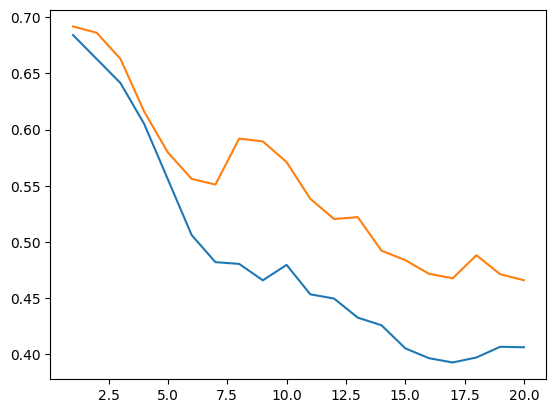

In [8]:
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')